In [2]:
# Importing the libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
# Fake dataset

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


### `explode()` 
- transforms each element of a list-like to a row
- Expand list-like data within a DataFrame column into separate rows.
- Commonly used to split list data into individual rows for analysis (hint hint) or when working with JSON data in a DataFrame.

In [4]:
df_skills.explode('job_skills')

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [7]:
df_skills.explode('job_skills').value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: ylabel='job_skills'>

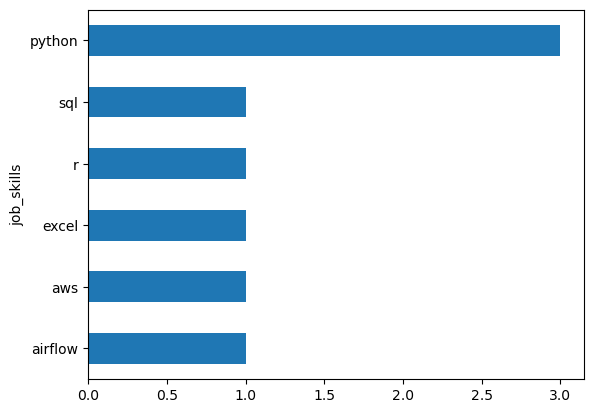

In [10]:
df_skills.explode('job_skills').value_counts('job_skills').sort_values(ascending=True).plot(kind = 'barh')

Trying to visualise the job_skills count in the dataframe

In [17]:
import ast 


In [ ]:
# Turn the column from str to list 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
df[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [22]:
sep_skills = df[['job_title_short','job_skills']].explode('job_skills')

sep_skills.value_counts('job_skills')

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
dingtalk             1
rocketchat           1
rubyon rails         1
wimi                 1
msaccess             1
Name: count, Length: 252, dtype: int64

<Axes: ylabel='job_skills'>

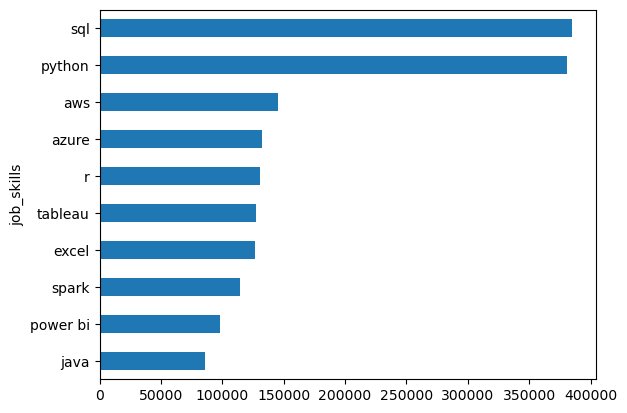

In [25]:
# This shows the frequency of the skill demanded from the job posting dataframe
sep_skills.value_counts('job_skills').head(10).sort_values(ascending=True).plot(kind= 'barh')

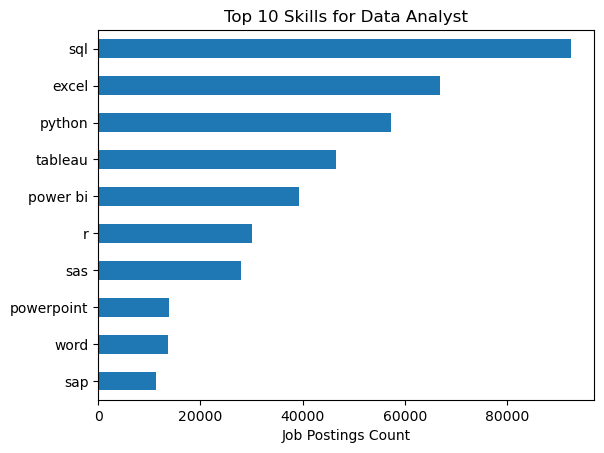

In [32]:
# I want to graph the demand for skills based on the job title
job_title = 'Data Analyst'
top = 10

skills_required = df['job_skills'][df['job_title_short'] == job_title].explode('job_skills').value_counts().head(top)

skills_required.sort_values(ascending= True).plot(kind= 'barh')
plt.title(f'Top {top} Skills for {job_title}')
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.show()


### Things I could have done (not that important)

more versatile is putting multible columns in a series `skills_count` and then reset the index `.reset_index(name= '')` to make it a dataframe, then visualise

In [ ]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

In [ ]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count


 Instead of sorting the values descending we can use a method from plt
`plt.gca().invert_yaxis()`

In [ ]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)


df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()